In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

desired_width=1200
pd.set_option('max_colwidth',desired_width)
pd.set_option('display.max_rows',None)

def indice(Label,column):
    i = 0
    for x in column:
        if x == Label:
            return  i
        i = i + 1

def set_value(data,id, property = None,value = None):
    if property is not None:
        data['Property'][id] = property

    if value is not None:
        data['Value'][id] = value


def transform_artist_dataset(dataset):
    i = 0
    vet = []
    for x in dataset['Property'] : 
        if x not in ('Name','Born','Career','Nation','Instruments','Group'):
            vet.append(i)
        i += 1
    
    result = dataset.drop(vet,axis = 0).transpose().reset_index()
    result.columns = list(result.iloc[0])
    result = result.drop(0,axis = 0)
    
    result = result[['Group','Name','Born','Nation','Career','Instruments']]
    
    return result

def transform_album_dataset(album):
    name = album.columns[0]
    album = album.transpose().reset_index()
    album.columns = list(album.iloc[0])
    album = album.drop([0,2],axis = 0)
    album = album.assign(Album=name)
    album = album.drop(labels=name,axis=1)
    return album[['Album','Recorded','Released','Studio','Genre','Length','Label','Producer','Singles']]
    

def song_album(dataset,album_name,side):
    album = dataset
    album = album.assign(Side = side)
    album = album.assign(Album = album_name)
    return album

def sell_album(album,name):
    sell = album
    return sell.assign(Album=name)


def convert_timestring_to_second(time_string):
    
    tmp = time_string.split(":")
    
    if int(tmp[0]) >= 60:
        hour = int(tmp[0])//60
        minute = int(tmp[0])%60
        string_time =  str(hour) + ":" + str(minute) + ":" + str(tmp[1])
        date_time = datetime.datetime.strptime(string_time, "%H:%M:%S")
    else :
        date_time = datetime.datetime.strptime(time_string, "%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    return a_timedelta.total_seconds()



In [5]:
data = pd.read_html("https://en.wikipedia.org/wiki/Led_Zeppelin")
#estrazioni informazioni banda
band=data[0].drop([0,1,8,9],axis=0).transpose().reset_index()
band.columns = list(band.iloc[0])
band.columns = list(['Name','Origin','Genres','Years active','Labels','Associated acts','Website'] )
band = band.drop(0,axis = 0)
band['Name'] = 'Led Zeppelin'

#artists
# artista Plant
data = pd.read_html("https://en.wikipedia.org/wiki/Robert_Plant")
artist = data[0]
artist.columns = list(['Property','Value'])

i = indice('Born',artist['Property'])
string = artist['Value'][i].split("(")
name = string[0].strip()
born = '20 August 1948'
nation = string[1].split(")")[1].split(",")[2].strip()

set_value(artist,0,'Name',name)
set_value(artist,i,None,born)
set_value(artist,3,'Career',None)
set_value(artist,6,'Nation',nation)
i = indice('Labels',artist['Property'])
set_value(artist,i,'Group','Led Zeppelin')
plant = transform_artist_dataset(artist)

#Page
data = pd.read_html("https://en.wikipedia.org/wiki/Jimmy_Page")
artist = data[0]
artist.columns = list(['Property','Value'])
i = indice('Born',artist['Property'])
string = artist['Value'][i].split("(")
name = string[0].strip()
nation = string[1].split(")")[1].split(",")[2].strip()
born = '9 January 1944'
set_value(artist,0,'Name',name)
set_value(artist,i,None,born)
set_value(artist,3,'Career',None)
set_value(artist,8,'Nation',nation)
i = indice('Labels',artist['Property'])
set_value(artist,i,'Group','Led Zeppelin')
page = transform_artist_dataset(artist)


#Jones
data = pd.read_html("https://en.wikipedia.org/wiki/John_Paul_Jones_(musician)")
artist = data[0]
artist.columns = list(['Property','Value'])
name = artist['Value'][2] + " " + artist['Value'][0].split()[0] 
i = indice('Born',artist['Property'])
nation = artist['Value'][i].split(",")[2]
born = '3 January 1946'
set_value(artist,0,'Name',name)
set_value(artist,i,None,born)
set_value(artist,8,'Career',None)
set_value(artist,1,'Nation',nation)
i = indice('Labels',artist['Property'])
set_value(artist,i,'Group','Led Zeppelin')
jones = transform_artist_dataset(artist)

#Bonham
data = pd.read_html("https://en.wikipedia.org/wiki/John_Bonham")
artist = data[0]
artist.columns = list(['Property','Value'])

name = artist['Value'][2].strip()
i = indice('Born',artist['Property'])
nation = artist['Value'][i].split(",")[2]
born = '31 May 1948(25 September 1980)'
set_value(artist,0,'Name',name)
set_value(artist,i,None,born)
set_value(artist,9,'Career',None)
set_value(artist,1,'Nation',nation)
i = indice('Labels',artist['Property'])
set_value(artist,i,'Group','Led Zeppelin')
bonham = transform_artist_dataset(artist)

artists = [plant,page,jones,bonham]
artists = pd.concat(artists).reset_index().drop(labels='index',axis=1)

## album

#album 1
data = pd.read_html("https://en.wikipedia.org/wiki/Led_Zeppelin_(album)")
album = data[0]
album[album.columns[0]][13] = 'Singles'
album[album.columns[1]][13] = album[album.columns[0]][14] 
album = album.drop([0,1,9,10,11,12,14],axis = 0)
album_1 = transform_album_dataset(album)

name = album_1['Album'][1]
song_a = song_album(data[5],name,'One')
song_b = song_album(data[6],name,'Two')
song_1 = pd.concat([song_a,song_b])
sold_1 = sell_album(data[12],name)

#album 2
data = pd.read_html("https://en.wikipedia.org/wiki/Led_Zeppelin_II")
album = data[0]
album[album.columns[0]][8] = 'Studio'
album[album.columns[1]][8] = ''
album[album.columns[0]][12] = 'Singles'
album[album.columns[1]][12] = album[album.columns[0]][13] 
album = album.drop([0,1,9,10,11,13],axis = 0)
album_2 = transform_album_dataset(album)
name = album_2['Album'][1]
song_a = song_album(data[6],name,'One')
song_b = song_album(data[7],name,'Two')
song_2 = pd.concat([song_a,song_b])
sold_2 = sell_album(data[13],name)

# album 3
data = pd.read_html("https://en.wikipedia.org/wiki/Led_Zeppelin_III")
album = data[0]
album[album.columns[0]][13] = 'Singles'
album[album.columns[1]][13] = album[album.columns[0]][14] 
album = album.drop([0,1,9,10,11,12,14],axis = 0)
album_3 = transform_album_dataset(album)
name = album_3['Album'][1]
song_a = song_album(data[5],name,'One')
song_b = song_album(data[6],name,'Two')
song_3 = pd.concat([song_a,song_b])
sold_3 = sell_album(data[12],name)

# album 4
data = pd.read_html("https://en.wikipedia.org/wiki/Led_Zeppelin_IV")
album = data[0]
album.columns = list(['Untitled(Led Zeppelin IV)','Untitled(Led Zeppelin IV).1','Unnamed'])
album[album.columns[0]][13] = 'Singles'
album[album.columns[1]][13] = album[album.columns[0]][14] 
album = album.drop([0,1,9,10,11,12,14],axis = 0)
album_4 = transform_album_dataset(album)
name = album_4['Album'][1]
song_a = song_album(data[4],name,'One')
song_b = song_album(data[5],name,'Two')
song_4 = pd.concat([song_a,song_b])
sold_4 = sell_album(data[9],name)

#album 5
data = pd.read_html("https://en.wikipedia.org/wiki/Houses_of_the_Holy")
album = data[0]
album[album.columns[0]][13] = 'Singles'
album[album.columns[1]][13] = album[album.columns[0]][14] 
album = album.drop([0,1,9,10,11,12,14],axis = 0)
album_5 = transform_album_dataset(album)
name = album_5['Album'][1]
song_a = song_album(data[5],name,'One')
song_b = song_album(data[6],name,'Two')
song_5 = pd.concat([song_a,song_b])
sold_5 = sell_album(data[10],name)

#album 6
data = pd.read_html("https://en.wikipedia.org/wiki/Physical_Graffiti")
album = data[0]
album[album.columns[0]][8] = 'Studio'
album[album.columns[1]][8] = ''
album[album.columns[0]][12] = 'Singles'
album[album.columns[1]][12] = album[album.columns[0]][13] 
album = album.drop([0,1,9,10,11,13],axis = 0)
album_6 = transform_album_dataset(album)
name = album_6['Album'][1]
song_a = song_album(data[5],name,'One')
song_b = song_album(data[6],name,'Two')
song_c = song_album(data[7],name,'Three')
song_d = song_album(data[8],name,'Four')
song_6 = pd.concat([song_a,song_b,song_c,song_d])
sold_6 = sell_album(data[13],name)

#album 7
data = pd.read_html("https://en.wikipedia.org/wiki/Presence_(album)")
album = data[0]
album[album.columns[0]][13] = 'Singles'
album[album.columns[1]][13] = album[album.columns[0]][14] 
album = album.drop([0,1,9,10,11,12,14],axis = 0)
album_7 = transform_album_dataset(album)
name = album_7['Album'][1]
song_a = song_album(data[4],name,'One')
song_b = song_album(data[5],name,'Two')
song_7 = pd.concat([song_a,song_b])
sold_7 = sell_album(data[10],name)

#album 8
data = pd.read_html("https://en.wikipedia.org/wiki/In_Through_the_Out_Door")
album = data[0]
album[album.columns[0]][13] = 'Singles'
album[album.columns[1]][13] = album[album.columns[0]][14] 
album = album.drop([0,1,9,10,11,12,14,15,16,17],axis = 0)
album_8 = transform_album_dataset(album)
name = album_8['Album'][1]
song_a = song_album(data[4],name,'One')
song_b = song_album(data[5],name,'Two')
song_8 = pd.concat([song_a,song_b])
sold_8 = sell_album(data[9],name)

#album 9
data = pd.read_html("https://en.wikipedia.org/wiki/Coda_(album)")
album = data[0]
album[album.columns[0]][9] = 'Singles'
album[album.columns[1]][9] = ''
album = album.drop([0,1,10,11],axis = 0)
album_9 = transform_album_dataset(album)
name = album_9['Album'][1]
song_a = song_album(data[4],name,'One')
song_b = song_album(data[5],name,'Two')
song_9 = pd.concat([song_a,song_b])
sold_9 = sell_album(data[11],name)

albums = pd.concat([album_1,album_2,album_3,album_4,album_5,album_6,album_7,album_8,album_9]).reset_index().drop(labels='index',axis = 1)
sells = pd.concat([sold_1,sold_2,sold_3,sold_4,sold_5,sold_6,sold_7,sold_8,sold_9]).reset_index().drop([11,22,35,47,54,61,64,70,74],axis=0)\
    .reset_index().drop(labels=['level_0','index'],axis=1)
songs = pd.concat([song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9]).reset_index().drop(labels=['index','Date and location','Date recorded'],axis=1)

KeyError: "['Group'] not in index"

In [3]:
#cleaning
labels = ['Album','Recorded','Released','Studio','Genre','Length','Label','Producer']
for label in labels:
    albums[label] = albums[label].replace(to_replace ='(\([\w\s]+\))*(\[\d*\])*', value = '', regex = True)
albums

labels = ['Region','Certification','Certified units/sales']	

for label in labels:
    sells[label] = sells[label].replace(to_replace ='(\([\w\s]+\))*(\[\d*\])*', value = '', regex = True)

sells['Certified units/sales'] = sells['Certified units/sales'].replace(to_replace ='[*^,]', value = '', regex = True)
sells['Certified units/sales'] = sells['Certified units/sales'].astype(str).astype(int)
sells = sells.assign(Quantity = 1)

sells['Certification'] = sells['Certification'].replace(to_replace ='[^0-9a-zA-Z\s]', value = 'X', regex = True)

sells.loc[(sells['Certification'] == '2X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 2
sells.loc[(sells['Certification'] == '3X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 3
sells.loc[(sells['Certification'] == '4X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 4
sells.loc[(sells['Certification'] == '6X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 6
sells.loc[(sells['Certification'] == '8X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 8
sells.loc[(sells['Certification'] == '9X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 9
sells.loc[(sells['Certification'] == '11X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 11
sells.loc[(sells['Certification'] == '12X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 12
sells.loc[(sells['Certification'] == '16X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 16
sells.loc[(sells['Certification'] == '23X Platinum') & (sells['Quantity'] == 1),'Quantity'] = 23
sells.loc[(sells['Certification'] == '2X Gold') & (sells['Quantity'] == 1),'Quantity'] = 2
sells.loc[(sells['Certification'] == '3X Gold') & (sells['Quantity'] == 1),'Quantity'] = 3
sells.loc[(sells['Certification'] == '2X Diamond') & (sells['Quantity'] == 1),'Quantity'] = 2
sells['Certification'] = sells['Certification'].replace(to_replace ='(\d+[X]\s)', value = '', regex = True)
sells['Region']  =  sells['Region'].replace(to_replace ='since 2010', value = '', regex = True)
sells

songs['Length'] = songs['Length'].replace(to_replace ='(\[[a-zA-Z0-9]\])', value = '', regex = True)
songs['Writer(s)'] = songs['Writer(s)'].replace(to_replace ='(\[[a-zA-Z0-9]\])', value = '', regex = True)   
songs['Title'] = songs['Title'].replace(to_replace ='\(.*\)', value = '', regex = True)
songs = songs.drop(66,axis=0).reset_index()

NameError: name 'albums' is not defined

In [17]:
band

,Name,Origin,Genres,Years active,Labels,Associated acts,Website
1,Led Zeppelin,"London, England",Hard rock blues rock folk rock heavy metal,"1968–1980(reunions: 1985, 1988, 1995, 2007)",Atlantic Swan Song,The Yardbirds The Honeydrippers Page and Plant,ledzeppelin.com


In [18]:
artists

,Group,Name,Born,Nation,Career,Instruments
0,Led Zeppelin,Robert Anthony Plant,20 August 1948,England,1965–present,Vocals
1,Led Zeppelin,James Patrick Page,9 January 1944,England,1957–present,Guitar
2,Led Zeppelin,John Baldwin Jones,3 January 1946,England,1961–present,Bass guitar keyboards mandolin guitar
3,Led Zeppelin,John Henry Bonham,31 May 1948(25 September 1980),England,1962–1980,Drums percussion


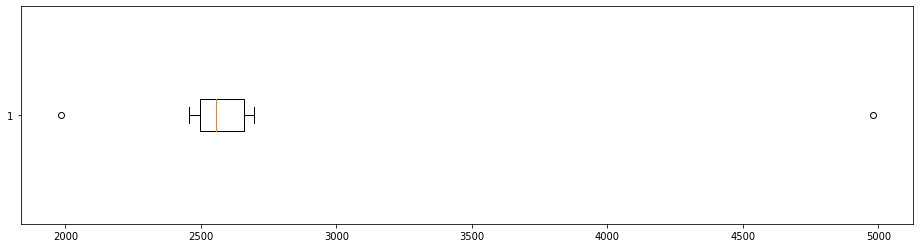

In [19]:
#boxplot durata albums
res_album = list(map(convert_timestring_to_second, albums['Length']))

fig1, ax = plt.subplots(figsize=(16,4))
bp = ax.boxplot(res_album,vert=False,autorange=True)

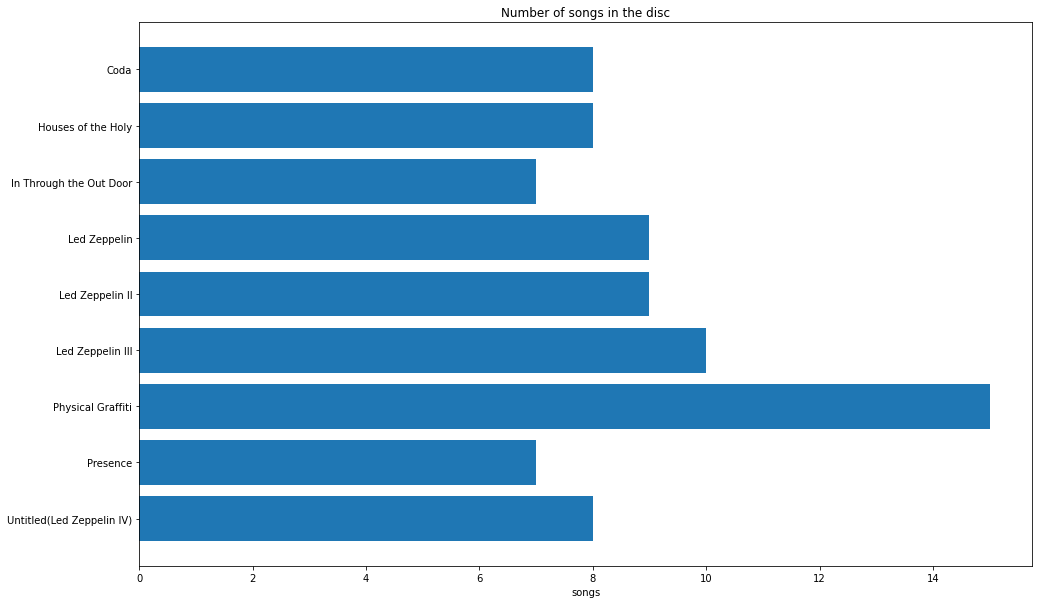

In [20]:
# barplot orizzontale numero canzoni per album
num_song_album = songs.groupby('Album')['No.'].count().reset_index(name = "numbers")


fig, ax = plt.subplots(figsize=(16,10))

values = num_song_album['numbers']
label = num_song_album['Album']
y_pos = np.arange(len(label))
ax.set_xlabel('songs')
ax.barh(y_pos, values)
ax.set_yticks(y_pos)
ax.set_yticklabels(num_song_album['Album'])
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_title('Number of songs in the disc')
plt.show()

In [21]:
albums

,Album,Recorded,Released,Studio,Genre,Length,Label,Producer,Singles
0,Led Zeppelin,September–October 1968,12 January 1969,"Olympic, London",Hard rock blues rock,44:56,Atlantic,Jimmy Page,"""Good Times Bad Times"" / ""Communication Breakdown""Released: 10 March 1969 (US)"
1,Led Zeppelin II,April–August 1969,22 October 1969,,Hard rock heavy metal blues rock,41:38,Atlantic,Jimmy Page,"""Whole Lotta Love"" / ""Living Loving Maid (She's Just A Woman)""Released: 7 November 1969 (US)"
2,Led Zeppelin III,November 1969 – August 1970,5 October 1970,"Rolling Stones Mobile, Headley Grange, HampshireIslandOlympic, London",Folk rock blues rock,43:04,Atlantic,Jimmy Page,"""Immigrant Song"" / ""Hey, Hey, What Can I Do""Released: 5 November 1970"
3,Untitled,December 1970 – February 1971 July 1971,8 November 1971,"Rolling Stones Mobile, Headley Grange, Hampshire Island, London",Hard rock heavy metal,42:34,Atlantic,Jimmy Page,"""Black Dog"" / ""Misty Mountain Hop""Released: 2 December 1971 ""Rock and Roll"" / ""Four Sticks""Released: 21 February 1972"
4,Houses of the Holy,December 1971 – August 1972,28 March 1973,"Rolling Stones Mobile, Stargroves and Headley Grange;Island and Olympic, London",Rock,40:57,Atlantic,Jimmy Page,"""Over the Hills and Far Away"" / ""Dancing Days""Released: 24 May 1973[2] ""D'yer Mak'er"" / ""The Crunge""Released: 17 September 1973[3]"
5,Physical Graffiti,"July and December 1970, January–March 1971, May 1972, January–February 1974 at multiple locations",24 February 1975,,Rock,82:59,Swan Song,Jimmy Page,"""Trampled Under Foot"" / ""Black Country Woman""Released: 2 April 1975"
6,Presence,November–December 1975,31 March 1976,"Musicland, Munich, Germany",Hard rock blues rock,44:19,Swan Song,Jimmy Page,"""Candy Store Rock"" b/w ""Royal Orleans""Released: 18 June 1976 (US)"
7,In Through the Out Door,November–December 1978,15 August 1979,"Polar, Stockholm, Sweden",Hard rockart rock,41:39,Swan Song,Jimmy Page,"""Fool in the Rain""/""Hot Dog""Released: 7 December 1979"
8,Coda,"9 January 1970 – 21 November 1978, overdubs 1982",19 November 1982,"Sol Studios, Cookham, Berkshire, England","Rock and roll, hard rock, blues rock",33:04,Swan Song,Jimmy Page,


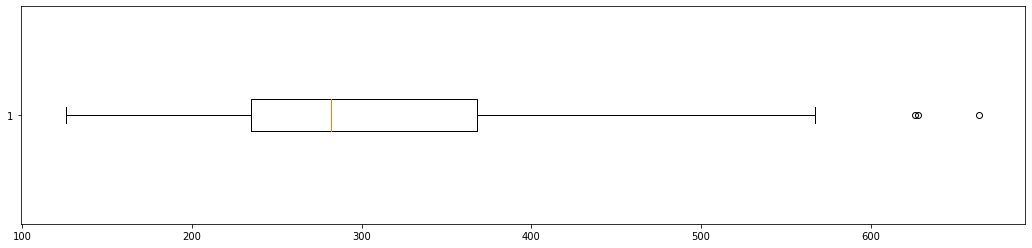

In [22]:
#boxplot songs
res_song = list(map(convert_timestring_to_second, songs['Length']))   #durata in secondi delle canzoni

fig1, ax = plt.subplots(figsize=(18,4))
bp = ax.boxplot(res_song,vert=False,autorange=True)

In [23]:
#canzoni
songs

,index,No.,Title,Writer(s),Length,Side,Album
0,0,1,"""Good Times Bad Times""",Jimmy PageJohn Paul JonesJohn Bonham,2:46,One,Led Zeppelin
1,1,2,"""Babe I'm Gonna Leave You""",Anne BredonPageRobert Plant,6:42,One,Led Zeppelin
2,2,3,"""You Shook Me""",Willie DixonJ. B. Lenoir,6:28,One,Led Zeppelin
3,3,4,"""Dazed and Confused""","Page, inspired by Jake Holmes",6:28,One,Led Zeppelin
4,4,1,"""Your Time Is Gonna Come""",PageJones,4:34,Two,Led Zeppelin
5,5,2,"""Black Mountain Side""",Page,2:12,Two,Led Zeppelin
6,6,3,"""Communication Breakdown""",PageJonesBonham,2:30,Two,Led Zeppelin
7,7,4,"""I Can't Quit You Baby""",Dixon,4:42,Two,Led Zeppelin
8,8,5,"""How Many More Times""",PageJonesBonham,8:27,Two,Led Zeppelin
9,9,1,"""Whole Lotta Love""",John BonhamWillie DixonJohn Paul JonesJimmy PageRobert Plant,5:34,One,Led Zeppelin II


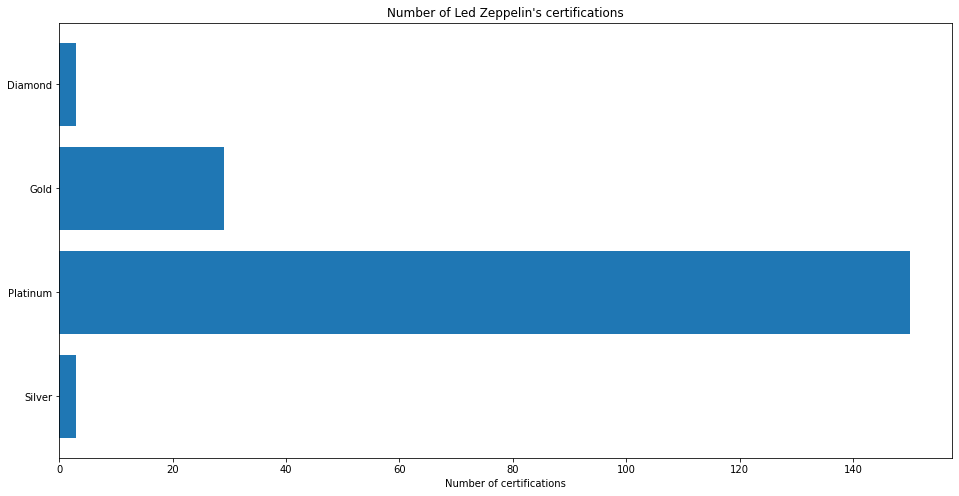

In [24]:
# barplot certificazioni 
certification = sells.groupby('Certification')['Quantity'].sum().reset_index(name = "numbers")


fig, ax = plt.subplots(figsize=(16,8))

values = certification['numbers']
label = certification['Certification']
y_pos = np.arange(len(label))
ax.set_xlabel('Number of certifications')
ax.barh(y_pos, values)
ax.set_yticks(y_pos)
ax.set_yticklabels(label)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_title('Number of Led Zeppelin\'s certifications')
plt.show()


In [25]:
sells.groupby('Certification')['Quantity'].sum()

Certification
Diamond       3
Gold         29
Platinum    150
Silver        3
Name: Quantity, dtype: int64

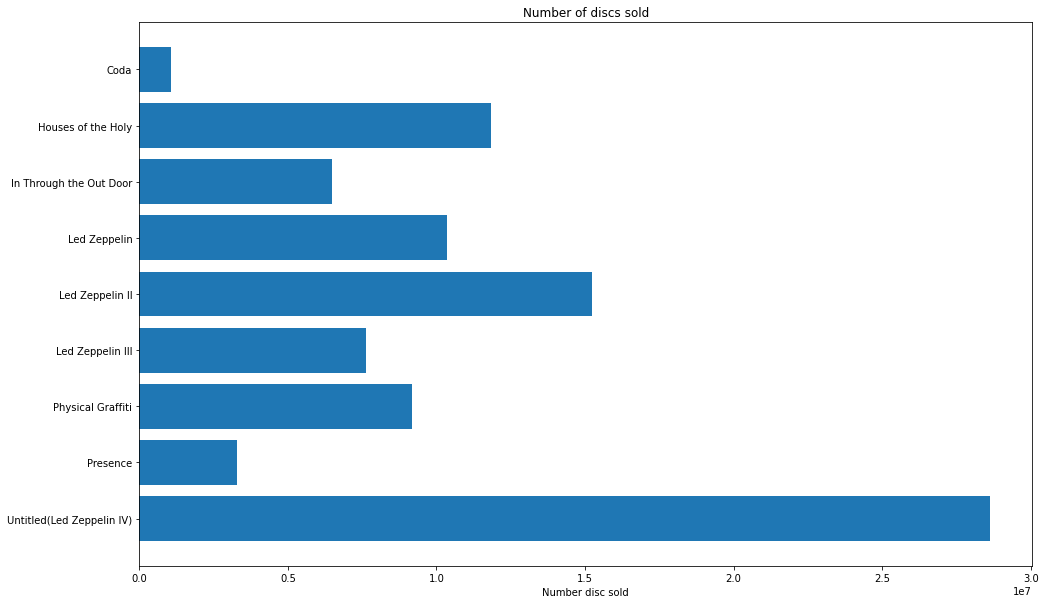

In [26]:
# barplot dischi venduti
disc_sells = sells.groupby('Album')['Certified units/sales'].sum().reset_index(name = "numbers")


fig, ax = plt.subplots(figsize=(16,10))

values = disc_sells['numbers']
label = disc_sells['Album']
y_pos = np.arange(len(label))
ax.set_xlabel('Number disc sold')
ax.barh(y_pos, values)
ax.set_yticks(y_pos)
ax.set_yticklabels(label)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_title('Number of discs sold')
plt.show()
